# Project: Predict who possible Defaulters are for the Consumer Loans Product


# Student Details:
Name: Ankur Chavan

### Problem statement
The task at hand is to develop a machine learning model that can accurately predict whether a loan should be approved or rejected, while ensuring that deserving applicants are not denied loans. The verification and validation process used by loan companies is intensive but does not provide complete assurance that a borrower will be able to repay the loan without difficulty. Moreover, the manual procedures used by loan companies to assess loan applications can be time-consuming and inefficient when dealing with large volumes of data. The goal of this project is to create a predictive model that can quickly and effectively determine whether to approve or reject a loan, even when processing a large amount of data.


### Importing  Modules:

In [280]:
import numpy as np  
import pandas as pd 
import os 
import glob
import gc 
import matplotlib.pyplot as plt 
import seaborn as sns
import math
import sklearn
%matplotlib inline
from sklearn.metrics import confusion_matrix
from sklearn import metrics 
from sklearn.metrics import roc_curve,auc


### Importing Data

In [281]:
# Importing data from csv file
df = pd.read_csv("Training Data.csv")

### Data Information

In [282]:
#Checking the no. of rows and columns in the data:
df.shape

(252000, 13)

In [283]:
#Checking the first 5 rows of the data:
df.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [284]:
# Data info:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 25.0+ MB


In [285]:
# Data description for numeric features:
df.describe()

,Id,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
count,252000.000000,2.520000e+05,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000
mean,126000.500000,4.997117e+06,49.954071,10.084437,6.333877,11.997794,0.123000
std,72746.278255,2.878311e+06,17.063855,6.002590,3.647053,1.399037,0.328438
min,1.000000,1.031000e+04,21.000000,0.000000,0.000000,10.000000,0.000000
25%,63000.750000,2.503015e+06,35.000000,5.000000,3.000000,11.000000,0.000000
50%,126000.500000,5.000694e+06,50.000000,10.000000,6.000000,12.000000,0.000000
75%,189000.250000,7.477502e+06,65.000000,15.000000,9.000000,13.000000,0.000000
max,252000.000000,9.999938e+06,79.000000,20.000000,14.000000,14.000000,1.000000


In [286]:
# Data description for categorical features (Object dtype):
df.describe(include=['O']).T 

,count,unique,top,freq
Married/Single,252000,2,single,226272
House_Ownership,252000,3,rented,231898
Car_Ownership,252000,2,no,176000
Profession,252000,51,Physician,5957
CITY,252000,317,Vijayanagaram,1259
STATE,252000,29,Uttar_Pradesh,28400


In [287]:
#Checking null values:
df.isnull().sum()

Id                   0
Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
CITY                 0
STATE                0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
Risk_Flag            0
dtype: int64

In [288]:
# Checking Column names:
df.columns

Index(['Id', 'Income', 'Age', 'Experience', 'Married/Single',
       'House_Ownership', 'Car_Ownership', 'Profession', 'CITY', 'STATE',
       'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS', 'Risk_Flag'],
      dtype='object')

In [289]:
#Checking the distribution of the 'Risk_Flag' variable:
df["Risk_Flag"].value_counts()

0    221004
1     30996
Name: Risk_Flag, dtype: int64

In [290]:
# Distribution of Risk_Flag variable:
counts = df["Risk_Flag"].value_counts()
percentages = counts / counts.sum() * 100
print(percentages)

0    87.7
1    12.3
Name: Risk_Flag, dtype: float64


### Exploratory Data Analysis

In [291]:
# Names of Unique states:
df['STATE'].unique()

array(['Madhya_Pradesh', 'Maharashtra', 'Kerala', 'Odisha', 'Tamil_Nadu',
       'Gujarat', 'Rajasthan', 'Telangana', 'Bihar', 'Andhra_Pradesh',
       'West_Bengal', 'Haryana', 'Puducherry', 'Karnataka',
       'Uttar_Pradesh', 'Himachal_Pradesh', 'Punjab', 'Tripura',
       'Uttarakhand', 'Jharkhand', 'Mizoram', 'Assam',
       'Jammu_and_Kashmir', 'Delhi', 'Chhattisgarh', 'Chandigarh',
       'Uttar_Pradesh[5]', 'Manipur', 'Sikkim'], dtype=object)

In [292]:
# Number of Unique states:
len(df['STATE'].unique())

29

In [293]:
# State wise data distribution:
df['STATE'].value_counts()

Uttar_Pradesh        28400
Maharashtra          25562
Andhra_Pradesh       25297
West_Bengal          23483
Bihar                19780
Tamil_Nadu           16537
Madhya_Pradesh       14122
Karnataka            11855
Gujarat              11408
Rajasthan             9174
Jharkhand             8965
Haryana               7890
Telangana             7524
Assam                 7062
Kerala                5805
Delhi                 5490
Punjab                4720
Odisha                4658
Chhattisgarh          3834
Uttarakhand           1874
Jammu_and_Kashmir     1780
Puducherry            1433
Mizoram                849
Manipur                849
Himachal_Pradesh       833
Tripura                809
Uttar_Pradesh[5]       743
Chandigarh             656
Sikkim                 608
Name: STATE, dtype: int64

In [294]:
# Number of Unique cities:
len(df['CITY'].unique())

317

In [295]:
# City wise data distribution
df['CITY'].value_counts()

Vijayanagaram       1259
Bhopal              1208
Bulandshahr         1185
Saharsa[29]         1180
Vijayawada          1172
                    ... 
Ujjain               486
Warangal[11][12]     459
Bettiah[33]          457
Katni                448
Karaikudi            431
Name: CITY, Length: 317, dtype: int64

In [296]:
#lowercase all the datapoints:

for column in df.columns:
    if df[column].dtype=='object':
        df[column]=df[column].apply(str.lower)

In [297]:
#keep only alphabetical charaters and remove rest in state and city columns:

df['CITY'] = df['CITY'].str.replace(r'[^a-zA-Z]', ' ', regex=True)
df['STATE'] = df['STATE'].str.replace(r'[^a-zA-Z]', ' ', regex=True)

#remove all leadind and trailing spaces
df['CITY'] = df['CITY'].str.replace(r'^\s+|\s+$', '', regex=True)
df['STATE'] = df['STATE'].str.replace(r'^\s+|\s+$', '', regex=True)

In [298]:
# Check for unique values after data cleaning:
print(df.CITY.nunique())
print(df.STATE.nunique())

316
28


In [299]:
# The average risk percentage of each city
df.groupby(["CITY"]).Risk_Flag.apply(lambda x: (x.sum() / x.size) * 100).sort_values(ascending=False).to_frame().head(15)

,Risk_Flag
CITY,
bhubaneswar,32.619440
gwalior,27.272727
bettiah,26.695842
kochi,25.286160
raiganj,23.955432
purnia,23.886640
barasat,23.870220
sikar,23.845194
buxar,23.147208


In [300]:
# The average risk percentage of each city
df.groupby(["CITY"]).Risk_Flag.apply(lambda x: (x.sum() / x.size) * 100).sort_values(ascending=False).to_frame().tail(15)

,Risk_Flag
CITY,
katni,4.687500
panihati,4.659091
gangtok,4.605263
bareilly,4.247104
berhampur,4.241436
belgaum,4.166667
latur,3.965517
mehsana,3.917051
mira bhayandar,3.862661


In [301]:
# The average risk percentage of each state
df.groupby("STATE").Risk_Flag.apply(lambda x: (x.sum() / x.size) * 100).sort_values(ascending=False).to_frame().head(15)

,Risk_Flag
STATE,
manipur,21.554770
tripura,16.810878
kerala,16.709733
jammu and kashmir,15.898876
madhya pradesh,15.436907
odisha,14.255045
rajasthan,14.083279
jharkhand,13.329615
chhattisgarh,13.328117


In [302]:
# The average risk percentage of each state
df.groupby("STATE").Risk_Flag.apply(lambda x: (x.sum() / x.size) * 100).sort_values(ascending=False).to_frame().tail(15)

,Risk_Flag
STATE,
west bengal,12.813525
haryana,12.420786
uttar pradesh,11.803864
gujarat,11.772440
puducherry,11.653873
andhra pradesh,11.602166
maharashtra,11.325405
mizoram,11.071849
delhi,10.455373


C:\Users\ankur\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Income'>

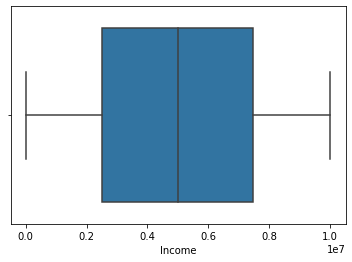

In [303]:
sns.boxplot(df.Income)

C:\Users\ankur\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

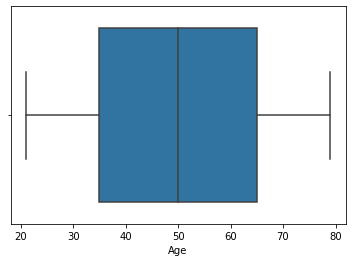

In [304]:
sns.boxplot(df.Age)

C:\Users\ankur\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Experience'>

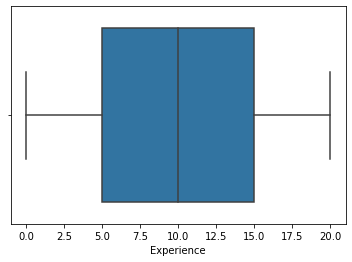

In [305]:
sns.boxplot(df.Experience)

In [306]:
# Function to plot percentage count plot 

def percentage_plt(ax, total):
    for i in ax.patches:
        percent = '{:.1f}%'.format(100 * i.get_height()/total)
        x_n = i.get_x() + i.get_width()
        y_n = i.get_height()
        ax.annotate(percent, (x_n, y_n))
    plt.show()

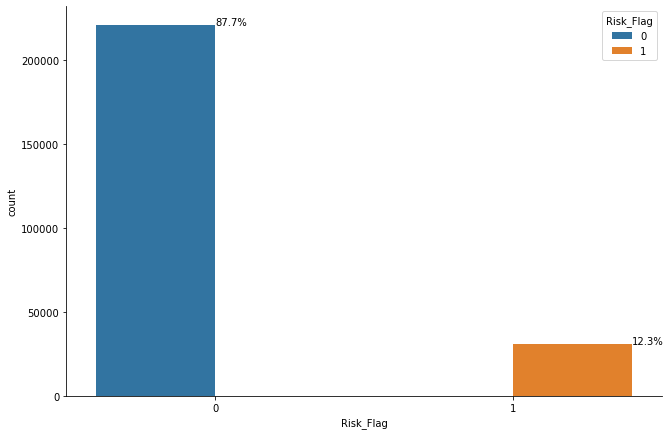

In [307]:
# Risk Flag
total = float(len(df))

sns.FacetGrid('greygrid', height=6, aspect=1.5)
ax=sns.countplot(data=df, hue='Risk_Flag', x='Risk_Flag')
percentage_plt(ax, total)

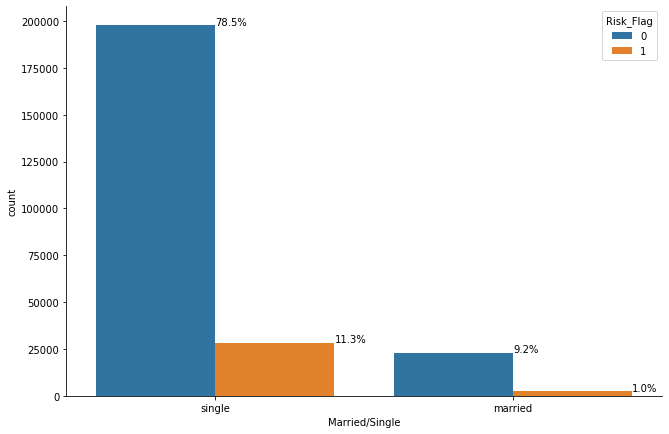

In [308]:
# Marriage status vs Risk Flag
sns.FacetGrid('whitegrid', height=6, aspect=1.5)
ax=sns.countplot(data=df, hue='Risk_Flag', x='Married/Single')
percentage_plt(ax, total)

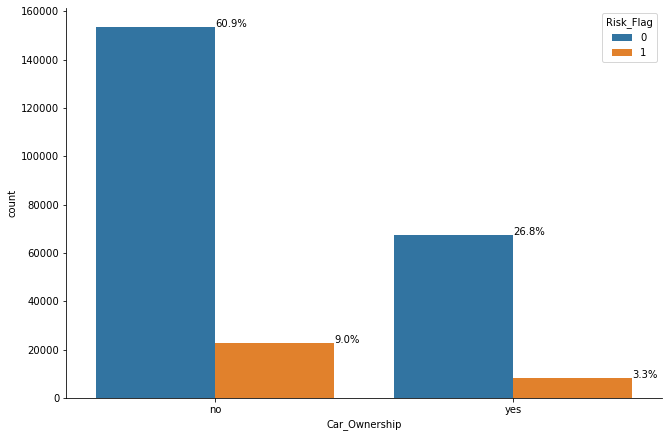

In [309]:
# car ownership vs Risk Flag
sns.FacetGrid('whitegrid', height=6, aspect=1.5)
ax=sns.countplot(data=df, hue='Risk_Flag', x='Car_Ownership')
percentage_plt(ax, total)

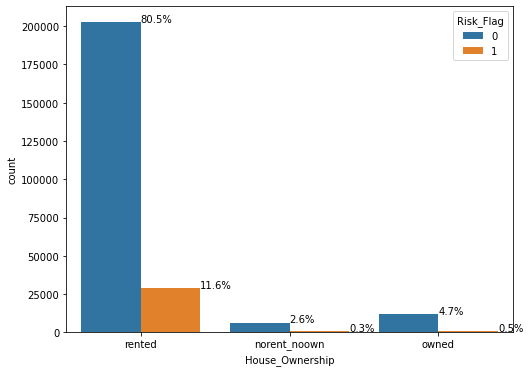

In [310]:
# House ownership vs Risk Flag
plt.figure(figsize=(8,6))
ax=sns.countplot(data=data, hue='Risk_Flag', x='House_Ownership')
percentage_plt(ax, total)

In [311]:
#Number of customers that have income less that 2 Lakhs per year
df['Income'][df['Income']<300000].count()

7478

In [312]:
# Number of house owners for each year
df.CURRENT_HOUSE_YRS.value_counts()

11    51873
12    51791
13    50659
14    49003
10    48674
Name: CURRENT_HOUSE_YRS, dtype: int64

In [313]:
# Unique values in each column
num = df.select_dtypes(["int", "float"]).columns

for num_columns in num:
    print(f"{num_columns}: {df[num_columns].nunique()} unique variables")

Id: 252000 unique variables
Income: 41920 unique variables
Age: 59 unique variables
Experience: 21 unique variables
CURRENT_JOB_YRS: 15 unique variables
CURRENT_HOUSE_YRS: 5 unique variables
Risk_Flag: 2 unique variables


In [314]:
# Unique Professions
df.Profession.unique()

array(['mechanical_engineer', 'software_developer', 'technical_writer',
       'civil_servant', 'librarian', 'economist', 'flight_attendant',
       'architect', 'designer', 'physician', 'financial_analyst',
       'air_traffic_controller', 'politician', 'police_officer', 'artist',
       'surveyor', 'design_engineer', 'chemical_engineer',
       'hotel_manager', 'dentist', 'comedian', 'biomedical_engineer',
       'graphic_designer', 'computer_hardware_engineer',
       'petroleum_engineer', 'secretary', 'computer_operator',
       'chartered_accountant', 'technician', 'microbiologist',
       'fashion_designer', 'aviator', 'psychologist', 'magistrate',
       'lawyer', 'firefighter', 'engineer', 'official', 'analyst',
       'geologist', 'drafter', 'statistician', 'web_designer',
       'consultant', 'chef', 'army_officer', 'surgeon', 'scientist',
       'civil_engineer', 'industrial_engineer', 'technology_specialist'],
      dtype=object)

In [315]:
# Number of Unique Professions
len(df.Profession.unique())

51

In [316]:
df["Profession"].value_counts()

physician                     5957
statistician                  5806
web_designer                  5397
psychologist                  5390
computer_hardware_engineer    5372
drafter                       5359
magistrate                    5357
fashion_designer              5304
air_traffic_controller        5281
comedian                      5259
industrial_engineer           5250
mechanical_engineer           5217
chemical_engineer             5205
technical_writer              5195
hotel_manager                 5178
financial_analyst             5167
graphic_designer              5166
flight_attendant              5128
biomedical_engineer           5127
secretary                     5061
software_developer            5053
petroleum_engineer            5041
police_officer                5035
computer_operator             4990
politician                    4944
microbiologist                4881
technician                    4864
artist                        4861
lawyer              

### Correlation between features:

In [317]:
# Create the correlation matrix
corr = df.corr()

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

corr.style.background_gradient(cmap=cmap)

,Id,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
Id,1.000000,-0.001324,-0.001816,-0.005810,-0.003250,0.001972,0.032153
Income,-0.001324,1.000000,-0.000652,0.006422,0.007045,-0.002397,-0.003091
Age,-0.001816,-0.000652,1.000000,-0.001118,0.002154,-0.020134,-0.021809
Experience,-0.005810,0.006422,-0.001118,1.000000,0.646098,0.019309,-0.034523
CURRENT_JOB_YRS,-0.003250,0.007045,0.002154,0.646098,1.000000,0.005372,-0.016942
CURRENT_HOUSE_YRS,0.001972,-0.002397,-0.020134,0.019309,0.005372,1.000000,-0.004375
Risk_Flag,0.032153,-0.003091,-0.021809,-0.034523,-0.016942,-0.004375,1.000000


# Feature Encoding 

In [318]:
# Importing necessary modules:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [319]:
# Encoding 'Married/Single' and Car_Ownership' columns:
label_encoder = LabelEncoder() 
for column in ['Married/Single','Car_Ownership']: df[column] = label_encoder.fit_transform( df[col] )

In [320]:
# Encoding 'House_Ownership' column:
onehot_encoder = OneHotEncoder(sparse = False)
df['House_Ownership'] = onehot_encoder.fit_transform(df['House_Ownership'].values.reshape(-1, 1))

In [321]:
df['House_Ownership'].head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: House_Ownership, dtype: float64

In [322]:
df.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,0,0.0,0,mechanical_engineer,rewa,madhya pradesh,3,13,0
1,2,7574516,40,10,0,0.0,0,software_developer,parbhani,maharashtra,9,13,0
2,3,3991815,66,4,0,0.0,0,technical_writer,alappuzha,kerala,4,10,0
3,4,6256451,41,2,1,0.0,1,software_developer,bhubaneswar,odisha,2,12,1
4,5,5768871,47,11,0,0.0,0,civil_servant,tiruchirappalli,tamil nadu,3,14,1


In [323]:
# Dropping the variables that won't be used during model building:
Final_df = df.drop(labels=['Profession', 'CITY', 'STATE'], axis=1)

In [324]:
Final_df.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,0,0.0,0,3,13,0
1,2,7574516,40,10,0,0.0,0,9,13,0
2,3,3991815,66,4,0,0.0,0,4,10,0
3,4,6256451,41,2,1,0.0,1,2,12,1
4,5,5768871,47,11,0,0.0,0,3,14,1


### Splitting the data into train and test data

In [325]:
# Input variable and target variable:
x = Final_df.drop("Risk_Flag", axis=1)
y = Final_df["Risk_Flag"]

In [326]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, stratify = y, random_state = 7)

# Random Forest Classifier

In [328]:
# Train the model and perform the predictions:
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

In [329]:
RandomForest_cls = RandomForestClassifier(criterion='gini', bootstrap=True, random_state=100)
smote_sampler = SMOTE(random_state=9)
model = Pipeline(steps = [['smote', smote_sampler],
                             ['classifier', RandomForest_cls]])
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

### Random Forest Classifier  Metrics:

In [330]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score, roc_auc_score
print("-------------------------TEST SCORES-----------------------") 
print(f"Recall: { round(recall_score(y_test, y_pred)*100, 4) }")
print(f"Precision: { round(precision_score(y_test, y_pred)*100, 4) }")
print(f"F1-Score: { round(f1_score(y_test, y_pred)*100, 4) }")
print(f"Accuracy score: { round(accuracy_score(y_test, y_pred)*100, 4) }")
print(f"AUC Score: { round(roc_auc_score(y_test, y_pred)*100, 4) }")

-------------------------TEST SCORES-----------------------
Recall: 59.6548
Precision: 42.6971
F1-Score: 49.7712
Accuracy score: 85.1905
AUC Score: 74.2133


ROC curve for RandomForestClassifier: 


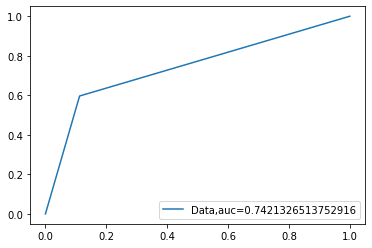

AUC Score:  0.7421326513752916


In [331]:
#Logistic Regression Roc curve
print("ROC curve for RandomForestClassifier: ")

# AUC and ROC Curve Function:
def auc_roc_curve_plot(y_test=None, preds=None):
    fpr,tpr,_=metrics.roc_curve(y_test,preds)
    auc=metrics.roc_auc_score(y_test,preds)
    plt.plot(fpr,tpr,label='Data,auc='+str(auc))
    plt.legend(loc=4)
    plt.show()
    print("AUC Score: ", auc)
    

auc_roc_curve_plot(y_test,y_pred)
 

### Logistic Regression

In [332]:
#Importing LogisticRegression:

from sklearn.linear_model import LogisticRegression

In [333]:
log_reg = LogisticRegression(penalty='l2',max_iter=50,C=5,class_weight='balanced')
log_reg.fit(x_train, y_train)
y_pred = log_reg.predict(x_test)
# print(y_test, y_pred)

### Logistic Regression Metrics:

In [334]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score, roc_auc_score
print("-------------------------TEST SCORES-----------------------") 
print(f"Recall: { round(recall_score(y_test, y_pred)*100, 4) }")
print(f"Precision: { round(precision_score(y_test, y_pred)*100, 4) }")
print(f"F1-Score: { round(f1_score(y_test, y_pred)*100, 4) }")
print(f"Accuracy score: { round(accuracy_score(y_test, y_pred)*100, 4) }")
print(f"AUC Score: { round(roc_auc_score(y_test, y_pred)*100, 4) }")

-------------------------TEST SCORES-----------------------
Recall: 63.1231
Precision: 12.7124
F1-Score: 21.1628
Accuracy score: 42.1548
AUC Score: 51.1686


ROC curve for Logistic Regression: 


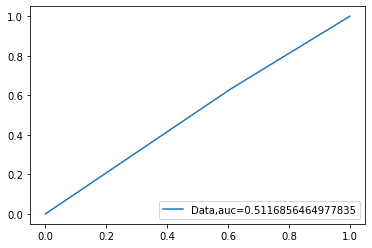

AUC Score:  0.5116856464977835


In [335]:
#Logistic Regression Roc curve
print("ROC curve for Logistic Regression: ")

# AUC and ROC Curve Function:
def auc_roc_curve_plot(y_test=None, preds=None):
    fpr,tpr,_=metrics.roc_curve(y_test,preds)
    auc=metrics.roc_auc_score(y_test,preds)
    plt.plot(fpr,tpr,label='Data,auc='+str(auc))
    plt.legend(loc=4)
    plt.show()
    print("AUC Score: ", auc)
    

auc_roc_curve_plot(y_test,y_pred)

###  Decision Tree

In [344]:
# Importing tree:

from sklearn import tree

In [345]:
Decision_T1 = tree.DecisionTreeClassifier(max_depth=None,random_state=None, class_weight=None)
Decision_T1.fit(x_train, y_train)
y_pred = Decision_T1.predict(x_test)

### Decision Tree Metrics:

In [346]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score, roc_auc_score
print("-------------------------TEST SCORES-----------------------") 
print(f"Recall: { round(recall_score(y_test, y_pred)*100, 4) }")
print(f"Precision: { round(precision_score(y_test, y_pred)*100, 4) }")
print(f"F1-Score: { round(f1_score(y_test, y_pred)*100, 4) }")
print(f"Accuracy score: { round(accuracy_score(y_test, y_pred)*100, 4) }")
print(f"AUC Score: { round(roc_auc_score(y_test, y_pred)*100, 4) }")

-------------------------TEST SCORES-----------------------
Recall: 39.458
Precision: 37.1789
F1-Score: 38.2846
Accuracy score: 84.3532
AUC Score: 65.0538


ROC curve for Decision Tree: 


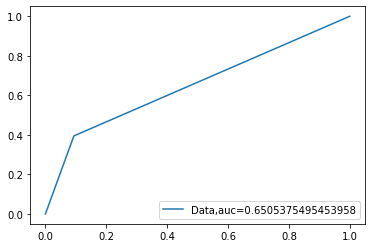

AUC Score:  0.6505375495453958


In [347]:
#Logistic Regression Roc curve
print("ROC curve for Decision Tree: ")

# AUC and ROC Curve Function:
def auc_roc_curve_plot(y_test=None, preds=None):
    fpr,tpr,_=metrics.roc_curve(y_test,preds)
    auc=metrics.roc_auc_score(y_test,preds)
    plt.plot(fpr,tpr,label='Data,auc='+str(auc))
    plt.legend(loc=4)
    plt.show()
    print("AUC Score: ", auc)
    

auc_roc_curve_plot(y_test,y_pred)

# Conclusion:
Based on the evaluation metrics results, it can be concluded that the Random Forest Classifier outperformed the other two models in predicting loan defaults. It has the highest accuracy score of 85.19%, which is significantly better than the other models. The Random Forest Classifier also has the highest Recall score of 59.65%, which means it correctly identified more default cases than the other two models. Additionally, the Random Forest Classifier has the highest AUC score of 74.21%, indicating that it has a better ability to distinguish between positive and negative cases.
